In [1]:
# importing libraries

import pandas as pd
from bokeh.io import export_png
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
import ssl
from math import cos, asin, sqrt, pi
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os


# ## **Reading Data and Examining Features**

In [2]:
# loading data
d = os.path.dirname(os.getcwd())
path = d+"\\data\\raw\\trip.csv"
tripdata = pd.read_csv(path)
tripdata.head()

index                            key  fare_amount  \
0  24238194    2015-05-07 19:52:06.0000003          7.5   
1  27835199    2009-07-17 20:04:56.0000002          7.7   
2  44984355   2009-08-24 21:45:00.00000061         12.9   
3  25894730    2009-06-26 08:22:21.0000001          5.3   
4  17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

In [3]:
# checking columns in the dataset

tripdata.columns

Index(['index', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [4]:
# adjusting the columns sequence

tripdata = tripdata[['index', 'key',  'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count','fare_amount']]

In [5]:
# checking the top 5 rows of the data

tripdata.head()

index                            key          pickup_datetime  \
0  24238194    2015-05-07 19:52:06.0000003  2015-05-07 19:52:06 UTC   
1  27835199    2009-07-17 20:04:56.0000002  2009-07-17 20:04:56 UTC   
2  44984355   2009-08-24 21:45:00.00000061  2009-08-24 21:45:00 UTC   
3  25894730    2009-06-26 08:22:21.0000001  2009-06-26 08:22:21 UTC   
4  17610152  2014-08-28 17:47:00.000000188  2014-08-28 17:47:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.999817        40.738354         -73.999512         40.723217   
1        -73.994355        40.728225         -73.994710         40.750325   
2        -74.005043        40.740770         -73.962565         40.772647   
3        -73.976124        40.790844         -73.965316         40.803349   
4        -73.925023        40.744085         -73.973082         40.761247   

   passenger_count  fare_amount  
0                1          7.5  
1                1          7.7  
2                1         12.9  
3                3          5.3  
4                5         16.0

In [6]:
# shape of data (train and test combined)

tripdata.shape

(200000, 9)

In [7]:
# information for features of the dataset

tripdata.info()


# ## **Describe Data**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              200000 non-null  int64  
 1   key                200000 non-null  object 
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
 8   fare_amount        200000 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [8]:
# checking statistical data for the features of the dataset

tripdata[['pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','passenger_count','fare_amount']].describe()


# ## **Hypothesis Generation**
# 
# We are making some assumptions based on what we expect from data. We will perform hypothesis validation in further steps.
# 
# 1. Fare Amount increased over the years.
# 2. Number of trips increases during peak hours
# 3. Fare amount is more for unusual hours
# 4. Fare amount will be more on weekends.
# 5. Fare Amount increases as distance increases.

# ## **Data Exploration , Data Cleaning and Feature Engineering**

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count     200000.000000    200000.000000      199999.000000     199999.000000   
mean         -72.527638        39.935885         -72.525292         39.923890   
std           11.437787         7.720539          13.117408          6.794829   
min        -1340.648410       -74.015515       -3356.666300       -881.985513   
25%          -73.992065        40.734796         -73.991407         40.733823   
50%          -73.981823        40.752592         -73.980093         40.753042   
75%          -73.967154        40.767158         -73.963658         40.768001   
max           57.418457      1644.421482        1153.572603        872.697628   

       passenger_count    fare_amount  
count    200000.000000  200000.000000  
mean          1.684535      11.359955  
std           1.385997       9.901776  
min           0.000000     -52.000000  
25%           1.000000       6.000000  
50%           1.000000       8.500000  
75%           2.000000      12.500000  
max         208.000000     499.000000

In [9]:
# checking for null values

tripdata.isna().sum()


# **Since there is only 1 null value for two of the features, we will remove those rows containg null values**

index                0
key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
fare_amount          0
dtype: int64

In [10]:
# dropping rows with null values for features

tripdata.dropna(axis=0, how='any',  subset=['dropoff_longitude', 'dropoff_latitude'], inplace=True)

In [11]:
# validating if null values are removed

tripdata.isna().sum()

index                0
key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
fare_amount          0
dtype: int64

In [12]:
# checking shape of data after removing null values

tripdata.shape

(199999, 9)

In [13]:
# converting pickup date time format to proper date format

tripdata['pickup_datetime'] = pd.to_datetime(tripdata['pickup_datetime'],format = '%Y-%m-%d %H:%M:%S UTC')

In [14]:
# validating pickup datetime format changes

tripdata.head()


# **Here, we are creating different columns for month, year and weekdays to validate our hypothesis. Also, we have dropped index and key columns as they are not required.**

index                            key     pickup_datetime  \
0  24238194    2015-05-07 19:52:06.0000003 2015-05-07 19:52:06   
1  27835199    2009-07-17 20:04:56.0000002 2009-07-17 20:04:56   
2  44984355   2009-08-24 21:45:00.00000061 2009-08-24 21:45:00   
3  25894730    2009-06-26 08:22:21.0000001 2009-06-26 08:22:21   
4  17610152  2014-08-28 17:47:00.000000188 2014-08-28 17:47:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.999817        40.738354         -73.999512         40.723217   
1        -73.994355        40.728225         -73.994710         40.750325   
2        -74.005043        40.740770         -73.962565         40.772647   
3        -73.976124        40.790844         -73.965316         40.803349   
4        -73.925023        40.744085         -73.973082         40.761247   

   passenger_count  fare_amount  
0                1          7.5  
1                1          7.7  
2                1         12.9  
3                3          5.3  
4                5         16.0

In [15]:
# creating different columns for pickup date time feature : weekdays, month,year, hour . These features will help in further data exploration as well.
tripdata.drop(['index','key'],axis = 1,inplace=True)
tripdata['pickup_date'] = tripdata['pickup_datetime'].dt.date
tripdata['pickup_weekday'] = tripdata['pickup_datetime'].dt.day_name()
tripdata['pickup_month'] = tripdata['pickup_datetime'].dt.month
tripdata['pickup_year'] = tripdata['pickup_datetime'].dt.year
tripdata['pickup_hour'] = tripdata['pickup_datetime'].dt.hour
tripdata.drop(['pickup_datetime'],axis = 1,inplace=True)
tripdata = tripdata[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude', 'passenger_count', 'pickup_date','pickup_weekday', 'pickup_month', 'pickup_year', 'pickup_hour', 'fare_amount']]
tripdata.head()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.999817        40.738354         -73.999512         40.723217   
1        -73.994355        40.728225         -73.994710         40.750325   
2        -74.005043        40.740770         -73.962565         40.772647   
3        -73.976124        40.790844         -73.965316         40.803349   
4        -73.925023        40.744085         -73.973082         40.761247   

   passenger_count pickup_date pickup_weekday  pickup_month  pickup_year  \
0                1  2015-05-07       Thursday             5         2015   
1                1  2009-07-17         Friday             7         2009   
2                1  2009-08-24         Monday             8         2009   
3                3  2009-06-26         Friday             6         2009   
4                5  2014-08-28       Thursday             8         2014   

   pickup_hour  fare_amount  
0           19          7.5  
1           20          7.7  
2           21         12.9  
3            8          5.3  
4           17         16.0

In [16]:
# function to plot total count for various categories of features

def plot(col_name):
  tripdata.groupby([col_name])[col_name].count().plot(kind="bar",color='g')
  plt.ylabel("Count Of Trips")
  plt.title("Count of trips Vs. {}".format(col_name),fontweight="bold")
  plt.figure(figsize=(15,15)) 


# ## **Count of Trips Vs Pickup Month**

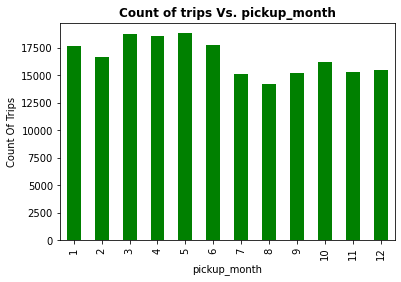

<Figure size 1080x1080 with 0 Axes>

In [17]:
plot('pickup_month')


# **For Months March,May,January,June, people tend to travel more as compared to other months.**

# ## **Count of Trips Vs pickup year**

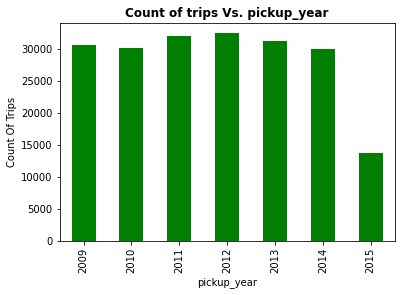

<Figure size 1080x1080 with 0 Axes>

In [18]:
plot('pickup_year')


# **The trips are slightly more for years 2011 and 2012**

# ## **Count of Trips Vs pickup hours**

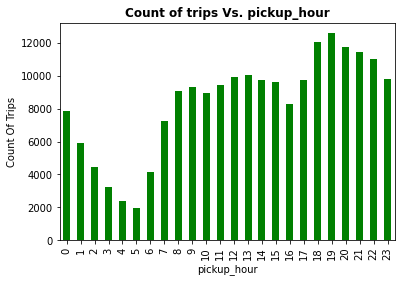

<Figure size 1080x1080 with 0 Axes>

In [19]:
plot('pickup_hour')


# **It can be observed that the number of trips increases for the peak hours like 5 pm, 6 pm. This also validates our one of the hypothesis.** 
# 

# ## **Trip count Vs pickup weekday**

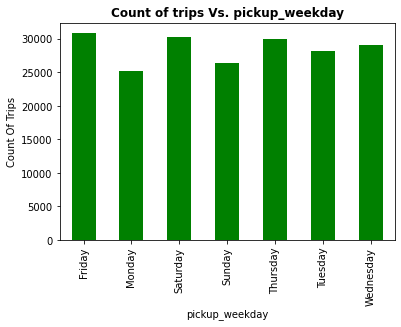

<Figure size 1080x1080 with 0 Axes>

In [20]:
plot('pickup_weekday')


# **For Fridays, Saturdays trips are more**

# ## **Count of Trips Vs Passenger Count**

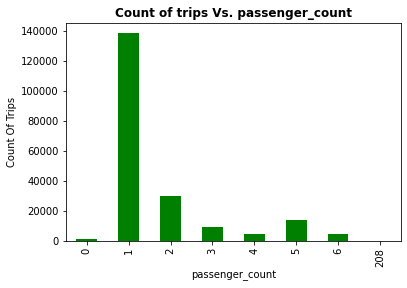

<Figure size 1080x1080 with 0 Axes>

In [21]:
plot('passenger_count')


# **Passenger count is one for most of the rides. 208 paseenger count is a noisy data point as it is not possible to have 208 as passenger count. We will remove this data point once we split the data into training and test data.**

# ## **Target Variable : Fare Amount Distribution** 

Text(0.5, 0, 'fare')

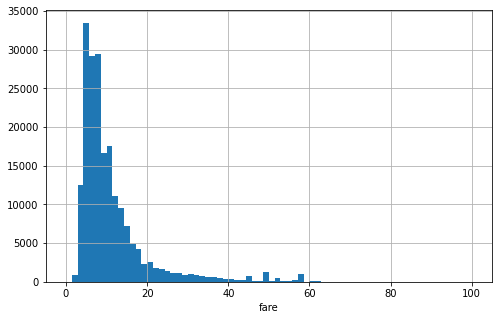

In [22]:
tripdata['fare_amount'].hist(bins=70, figsize=(8,5),range=(0, 100))
plt.xlabel('fare')

In [23]:
print(f"There are {len(tripdata[tripdata['fare_amount'] < 0])} negative fares.")
print(f"There are {len(tripdata[tripdata['fare_amount'] == 0])} $0 fares.")
print(f"There are {len(tripdata[tripdata['fare_amount'] > 100])} fares greater than $100.")

There are 17 negative fares.
There are 5 $0 fares.
There are 84 fares greater than $100.


In [24]:
# specifically for checking maximum and minimum values for fare amount

tripdata[['fare_amount']].describe()


# **Performing train test split. We will be first processing training data. During model validation, we will handle test data data transformation if required.**

fare_amount
count  199999.000000
mean       11.359892
std         9.901760
min       -52.000000
25%         6.000000
50%         8.500000
75%        12.500000
max       499.000000

In [25]:
# Train Test split

train, test = train_test_split(tripdata, test_size = 0.2, random_state = 0)


# ## **Feature binning**

In [26]:
# creating feature binning for categorizing target variable fare amount 

bins = [0,5,10,15,20,25,30,35,40,45,50,np.inf]
train['farebins'] = pd.cut(train['fare_amount'], bins)

<ipython-input-26-ac88f33274a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['farebins'] = pd.cut(train['fare_amount'], bins)


In [27]:
# checking count for different farebins

train['farebins'].value_counts()


# ## **Fare Bins Count**

(5.0, 10.0]     74905
(10.0, 15.0]    31840
(0.0, 5.0]      24913
(15.0, 20.0]    11950
(20.0, 25.0]     5052
(25.0, 30.0]     3166
(30.0, 35.0]     2252
(50.0, inf]      2101
(35.0, 40.0]     1353
(45.0, 50.0]     1311
(40.0, 45.0]     1138
Name: farebins, dtype: int64

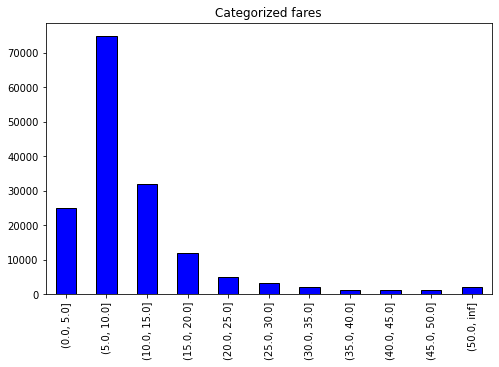

In [28]:
# Fare bins count 

train['farebins'].value_counts().sort_index().plot.bar(color = 'b', edgecolor = 'k',figsize=(8,5));
plt.title('Categorized fares');


# **The fare amount mostly lies in between 5-10 range followed by 10-15 and 0-5**

# ## **Outlier Detection and Removal**

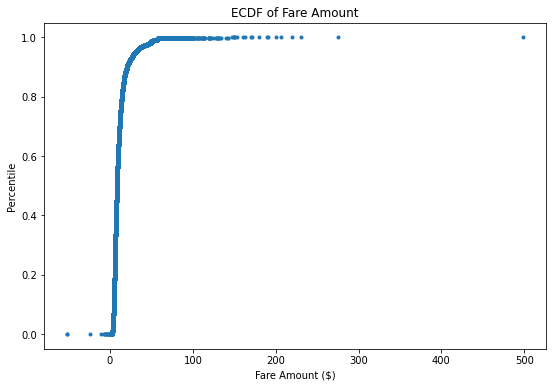

In [29]:
# Empirical Cumulative Distribution Function Plot for target variable 

x = np.sort(train['fare_amount'])
n = len(train['fare_amount'])
y = np.arange(1, n + 1, 1) / n
plt.figure(figsize = (9, 6))
plt.plot(x, y, '.')
plt.ylabel('Percentile'); plt.title('ECDF of Fare Amount'); plt.xlabel('Fare Amount ($)');


# **ECDF helps in identifying outliers as well, we can see fare amount outliers as well near 500 and 300**

In [30]:
# checking trips having more than 200 fare amount

train[(train['fare_amount'] > 200)]


# **We won't be removing fare amount greater than 200 right now, as we will calculate distance and check if these fare amounts are justified or not.**

# **Before proceeding with the outlier removal for any other features, we will try to remove outliers for pick up and drop off location. There might be possibility that outliers for other features are removed while dealing with location wise outliers.**

pickup_longitude  pickup_latitude  dropoff_longitude  \
23682         -73.782161        40.644601         -74.449079   
197493        -73.937765        40.758267         -74.382200   
185325          0.000000         0.000000           0.000000   
29261         -73.801147        40.671653         -73.790402   
170081        -73.968377        40.764602         -73.968368   

        dropoff_latitude  passenger_count pickup_date pickup_weekday  \
23682          40.836457                1  2014-11-02         Sunday   
197493         40.700890                2  2014-09-07         Sunday   
185325          0.000000                1  2013-04-19         Friday   
29261          40.646742                1  2013-09-27         Friday   
170081         40.764600                1  2011-04-10         Sunday   

        pickup_month  pickup_year  pickup_hour  fare_amount     farebins  
23682             11         2014           22       206.38  (50.0, inf]  
197493             9         2014            8       230.00  (50.0, inf]  
185325             4         2013            0       275.00  (50.0, inf]  
29261              9         2013           12       220.00  (50.0, inf]  
170081             4         2011            4       499.00  (50.0, inf]

In [31]:
# checking trips having latitude and longitude values equal to 0

train[(train.pickup_latitude==0) | (train.pickup_longitude)==0 | (train.dropoff_latitude==0)|(train.dropoff_longitude==0)].shape

(3062, 12)

In [32]:
# checking statistical details specifically for longitude and latitude values

train.describe()


# ## **Plot for dropoff Locations and pickup Locations**

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count     159999.000000    159999.000000      159999.000000     159999.000000   
mean         -72.503529        39.920544         -72.488147         39.907786   
std           11.164494         7.030399          11.045866          6.669832   
min         -768.550000       -74.014323        -737.916665       -881.985513   
25%          -73.992048        40.734759         -73.991360         40.733831   
50%          -73.981781        40.752630         -73.980008         40.753087   
75%          -73.967102        40.767137         -73.963571         40.768026   
max           57.418457      1292.016128        1153.572603        493.533332   

       passenger_count   pickup_month    pickup_year    pickup_hour  \
count    159999.000000  159999.000000  159999.000000  159999.000000   
mean          1.681336       6.281589    2011.742748      13.487834   
std           1.305962       3.441712       1.856664       6.516377   
min           0.000000       1.000000    2009.000000       0.000000   
25%           1.000000       3.000000    2010.000000       9.000000   
50%           1.000000       6.000000    2012.000000      14.000000   
75%           2.000000       9.000000    2013.000000      19.000000   
max           6.000000      12.000000    2015.000000      23.000000   

         fare_amount  
count  159999.000000  
mean       11.365727  
std         9.861955  
min       -52.000000  
25%         6.000000  
50%         8.500000  
75%        12.500000  
max       499.000000

[(-74.7, -73.3)]

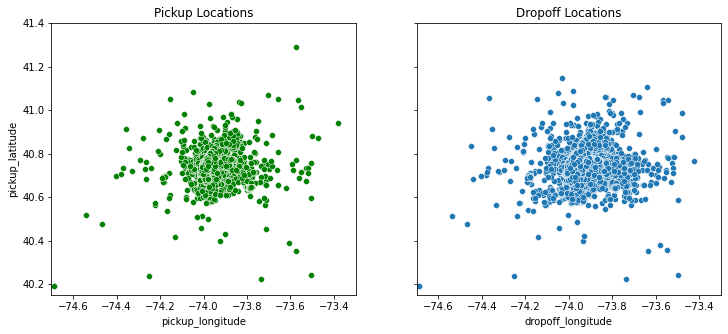

In [33]:
# scatter plot for pickup and drop off locations

warnings.filterwarnings('ignore')
fig, axes = plt.subplots(1, 2, figsize = (12, 5), sharex=True, sharey=True)
axes = axes.flatten()
# Plot Longitude (x) and Latitude (y)
g = sns.scatterplot('pickup_longitude', 'pickup_latitude', 
            data = train, ax = axes[0],color='green' );
k =sns.scatterplot('dropoff_longitude', 'dropoff_latitude',  
            data = train, ax = axes[1]);
axes[0].set_title('Pickup Locations')
axes[1].set_title('Dropoff Locations');
city_long_border = (-74.70, -73.30)
city_lat_border = (40.15, 41.40)
g.set(ylim=city_lat_border)
g.set(xlim = city_long_border )


# **This plot does not give much clear idea about pickup and drop off locations. For proper visualization, we will plot locations on the actual map.**

# ## **Pickup and Dropoff Locations on map**

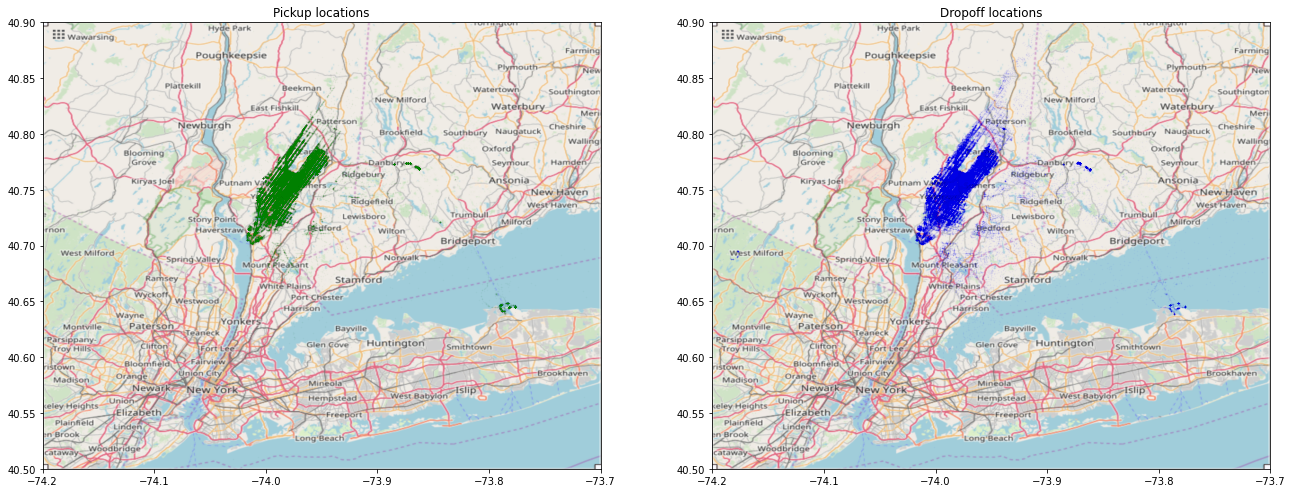

In [34]:
# plotting locations for pickup and drop off on the actual map.
import ssl
axis = (-74.20, -73.70, 40.50, 40.90)
import certifi
import imageio
#ssl._create_default_https_context = ssl._create_unverified_context
nyc_map = imageio.imread(r'C:\Users\saksh\venv\Trip Fare Amount Prediction\notebooks\nyc_map.png')

def plot_on_map(df,nyc_map, color = False):
    fig, axs = plt.subplots(1, 2, figsize=(22, 18))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=0.05, c='g', s=0.05)
    axs[0].set_xlim((axis[0], axis[1]))
    axs[0].set_ylim((axis[2], axis[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=axis)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=0.05, c='b', s=0.05)
    axs[1].set_xlim((axis[0], axis[1]))
    axs[1].set_ylim((axis[2], axis[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=axis)
    

plot_on_map(train,nyc_map)


# **As per statistical data, the minimum and maximum values are very high  or low according to the most of the latitude and longitude range. We have selected range for latitude and longitude values according to the statistical data and the map plotted above**

In [35]:
# confining training data to have latitude and longitude values between specified range.

train = train.loc[train['pickup_latitude'].between(39.5, 42)]
train= train.loc[train['pickup_longitude'].between(-74, -72)]
train = train.loc[train['dropoff_latitude'].between(39.5, 42)]
train = train.loc[train['dropoff_longitude'].between(-75, -72)]
print(f'New number of observations: {train.shape[0]}')

New number of observations: 135558


In [36]:
# function to plot farebins vs locations on the map

def plot_map(col_x="pickup_longitude" , col_y= "pickup_latitude",col_name = 'farebins'):
  sns.set(rc={'figure.figsize':(16,16)})
  axis = (-75.20, -73.40, 38.50, 42.89)
  sns.scatterplot(data=train, x=col_x, y=col_y,hue= col_name,palette="flare")
  plt.imshow(nyc_map, zorder=0, extent=axis, aspect='auto')
  


# ## **Fare Bins Vs pickup location**

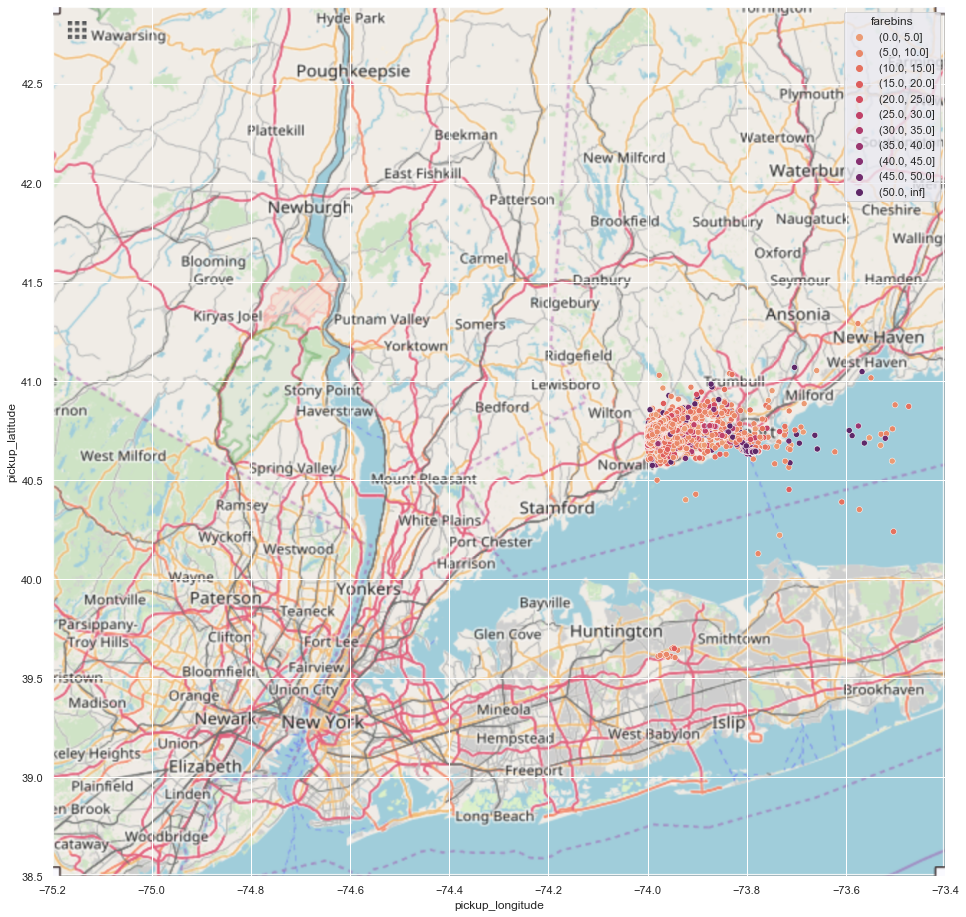

In [37]:
plot_map()


# ## **Fare Bins Vs drop off locations**

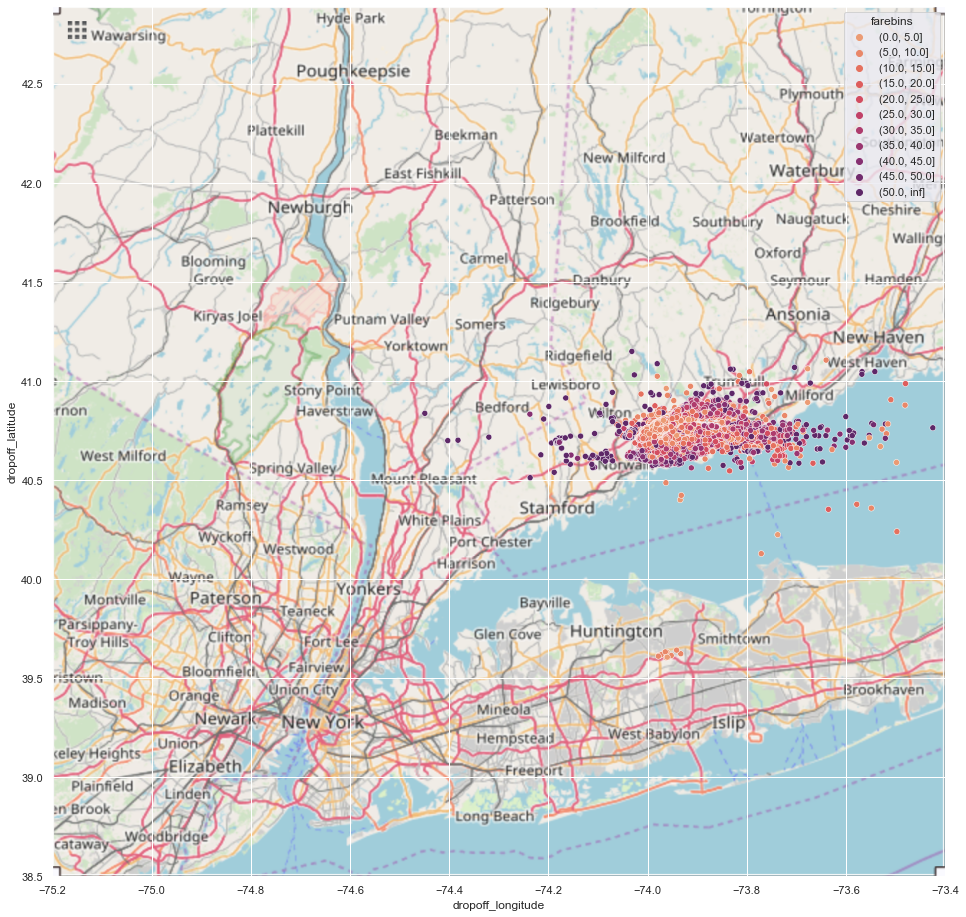

In [38]:
plot_map("dropoff_longitude","dropoff_latitude")


# **As expected in both the maps, most of the data points are having fare amount within range 0-5 or 5-10**

# **Another observations that we have is, many data points are lying in invalid locations like many data points are lying in water. That seems to be noisy data. we will remove the data points that are lying in water**

In [39]:
# function to remove data points which seems to be noisy as per the location in the map

def invalid_location(original_data,m,n,p):
  df = original_data[(original_data['dropoff_longitude'] > m) & (original_data['dropoff_latitude'] > n) & (original_data['dropoff_latitude'] < p)  ]
  return df

In [40]:
# Removing data points lying in water using the latitude and longitude values that are visible in map for those outlier data points

tripdata1 = invalid_location(train,-74,40,40.5)
train=train[~train.isin(tripdata1)].dropna(how = 'all')
tripdata1 = invalid_location(train,-73.75,40.5,40.8)
train=train[~train.isin(tripdata1)].dropna(how = 'all')
tripdata1 = invalid_location(train,-73.61,40.5,41)
train=train[~train.isin(tripdata1)].dropna(how = 'all')

In [41]:
# shape of data after removing points lying in water

train.shape


# ## **Map Plot for dropoff locations after removing invalid locations**

(135397, 12)

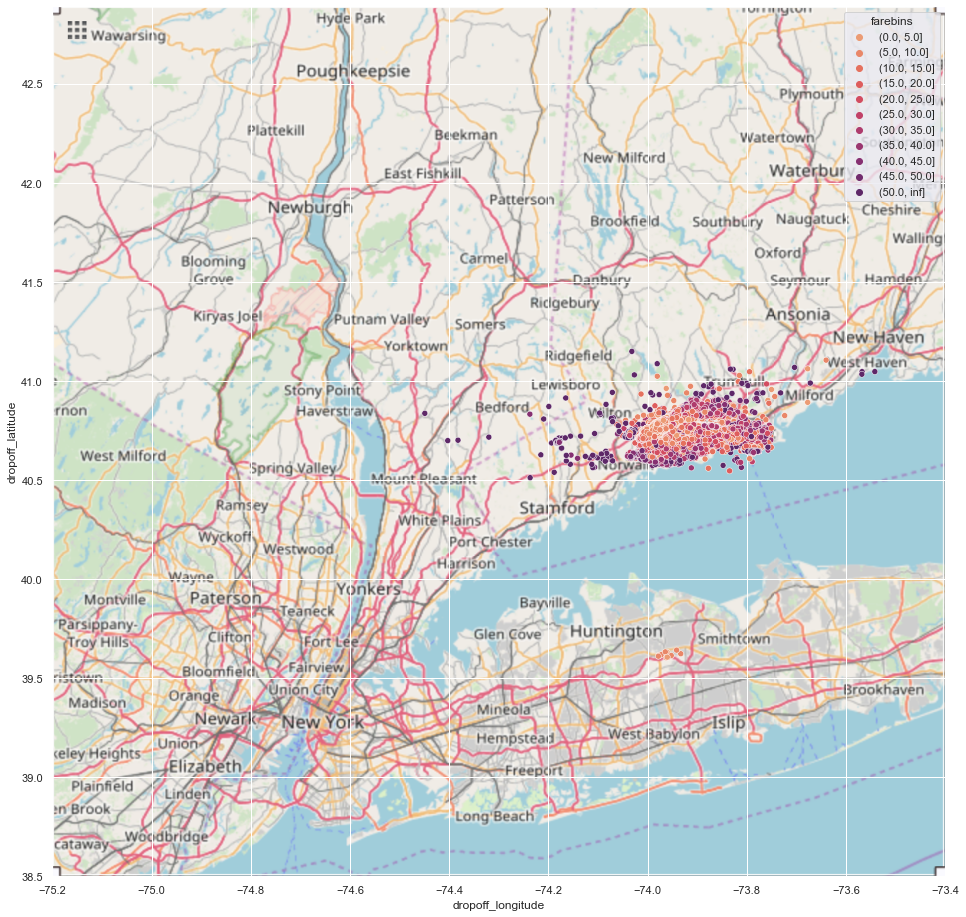

In [42]:
# validating if points lying in water are removed for dropoff locations

plot_map("dropoff_longitude","dropoff_latitude")


# ## **Map Plot for pickup locations after removing invalid locations**

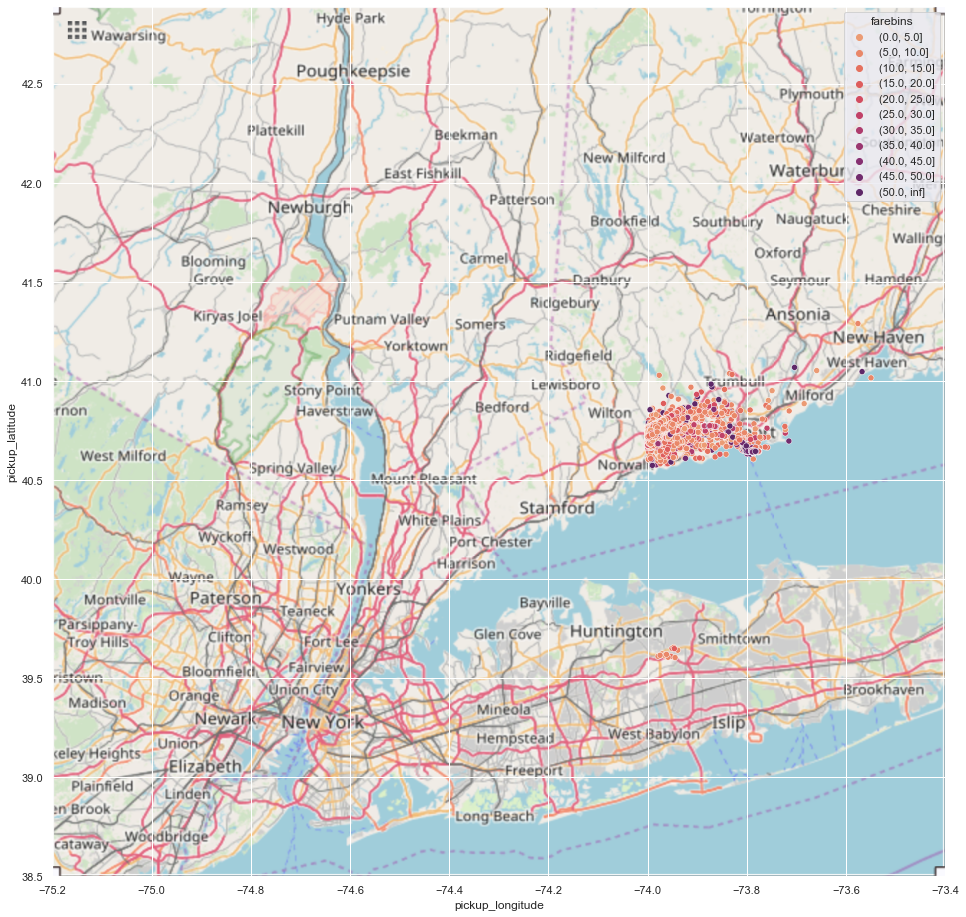

In [43]:
# validating if points lying in water are removed for pickup locations

plot_map()


# **Now since location wise, we have removed some outliers. We will now focus on calculating distance using latitude and longitude locations.**

In [44]:
# function to calculate distance in kilometers using latitude and longitude locations.Distance between points using Haversine distance

def calculate_distance( pickup_longitude,pickup_latitude, dropoff_longitude,dropoff_latitude):
    pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude = map(np.radians, [pickup_longitude,pickup_latitude, dropoff_longitude,dropoff_latitude])

    # Find the differences
    longitude_diff = dropoff_longitude - pickup_longitude
    latitude_diff = dropoff_latitude - pickup_latitude

    # Apply the formula 
    a = np.sin(latitude_diff/2.0)**2 + np.cos(pickup_latitude) * np.cos(dropoff_latitude) * np.sin(longitude_diff/2.0)**2
    # Calculate the angle (in radians)
    angle = 2 * np.arcsin(np.sqrt(a))
    # Convert to kilometers
    distance_km =  6371.0072  * angle
    
    return distance_km


# **Adding new column distance**

In [45]:
# applying function to all the rows of the dataframe to add new column

train['distance'] =  train.apply(lambda row:calculate_distance(row['pickup_longitude'],row['pickup_latitude'],row['dropoff_longitude'],row['dropoff_latitude']),axis=1)


# **After calculating distance, we can remove trips having 0 distance. Also, as discussed above , we cannot remove the large fare amounts directly. so for reasoning, we will be removing trips having fare amounts which are more than 100 for trip distance between 0 to 1 miles, as this can not be possible to have such high fare for such shorter distance. Even if we compare with other records, most of the trips are having fare amount around 5 - 10 or 0-5 range even for distances more than 1 mile.**

In [46]:
# removing trips having distance value equal to zero

remove_data = train[train['distance'] == 0 ]
train = train[~train.isin(remove_data)].dropna(how = 'all')

# removing trips having distance between 0 to 1 miles but having fare amount more than 100 for that range.

remove_data1 = train[((train['distance'] >= 0) & (train['distance'] <= 1) & (train['fare_amount'] > 100) )]
train = train[~train.isin(remove_data1)].dropna(how = 'all')
train.shape


# ## **Distance Vs Binned Fare Amount**

(133986, 13)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '(0.0, 5.0]'),
  Text(1, 0, '(5.0, 10.0]'),
  Text(2, 0, '(10.0, 15.0]'),
  Text(3, 0, '(15.0, 20.0]'),
  Text(4, 0, '(20.0, 25.0]'),
  Text(5, 0, '(25.0, 30.0]'),
  Text(6, 0, '(30.0, 35.0]'),
  Text(7, 0, '(35.0, 40.0]'),
  Text(8, 0, '(40.0, 45.0]'),
  Text(9, 0, '(45.0, 50.0]'),
  Text(10, 0, '(50.0, inf]')])

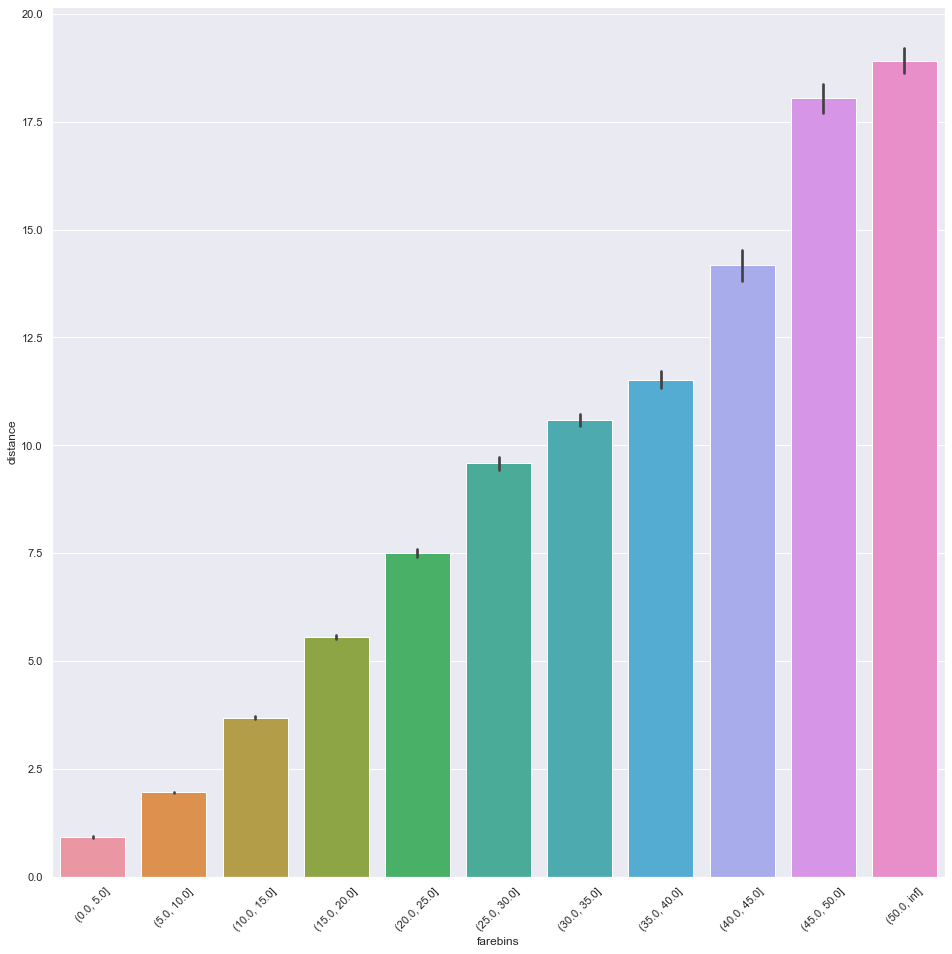

In [47]:
# plotting binned fare amount vs Distance graph 

sns.barplot(data=train, x="farebins", y="distance")
sns.set(rc = {'figure.figsize':(7,8)})
plt.xticks(rotation=45)


# **We have high fare amount for trips having larger distances.This also validates our one of the assumptions.**

# **Checking if more outliers can be detected**

# ## **Box plots for remaining outlier detection**

<AxesSubplot:xlabel='dropoff_latitude'>

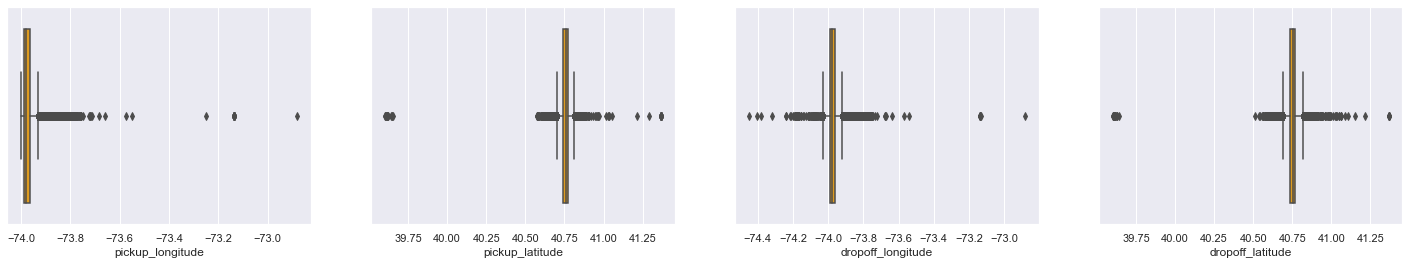

In [48]:
# box plot for detection of remaining outliers if left

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(25,4))
sns.boxplot(x=train['pickup_longitude'],ax=ax1,color = 'orange')
sns.boxplot(x=train['pickup_latitude'],ax=ax2,color = 'orange')
sns.boxplot(x=train['dropoff_longitude'],ax=ax3,color = 'orange')
sns.boxplot(x=train['dropoff_latitude'],ax=ax4,color = 'orange')

<AxesSubplot:xlabel='distance'>

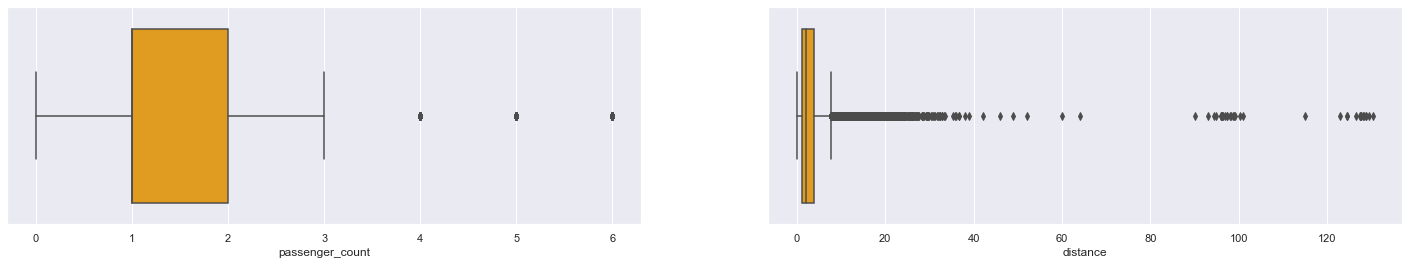

In [49]:
# box plot for detection of remaining outliers if left

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(25,4))
sns.boxplot(x=train['passenger_count'],ax=ax1,color = 'orange')
sns.boxplot(x=train['distance'],ax=ax2,color = 'orange')

In [50]:
train['passenger_count'].value_counts()

1.0    93141
2.0    19591
5.0     9322
3.0     5828
6.0     2844
4.0     2780
0.0      480
Name: passenger_count, dtype: int64

In [51]:
print("Number of trips having passenger count as 0: ",train[train['passenger_count'] == 0].shape[0])

Number of trips having passenger count as 0:  480


In [52]:
# Removing the records having passenger count as 0

train = train[train['passenger_count'] != 0]

In [53]:
train.shape

(133506, 13)

In [54]:
print("trips having distance more than 130 miles is",train[train['distance']>132].shape[0])
print("Maximum distance value in the training data: ",max(train['distance']))


# **We removed trips having passenger count as 0, and for distance, we have maximum value of fare amount equal to about 130. we have already removed trips with fare amount more than 150 while dealing with other outliers.**

trips having distance more than 130 miles is 0
Maximum distance value in the training data:  130.5425467606035


In [55]:
train.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'pickup_date', 'pickup_weekday',
       'pickup_month', 'pickup_year', 'pickup_hour', 'fare_amount', 'farebins',
       'distance'],
      dtype='object')

In [56]:
# converting weekdays to numerical features

train['pickup_weekday'] = pd.to_datetime(train['pickup_date']).apply(lambda x: x.weekday())

In [57]:
train['fare_amount_per_km'] = train['fare_amount']/train['distance']

In [58]:
train.head()

pickup_longitude  pickup_latitude  dropoff_longitude  \
104406        -73.954347        40.763839         -73.950884   
155552        -73.977028        40.743278         -73.986602   
75475         -73.983017        40.781655         -73.976823   
142151        -73.982161        40.757050         -73.959005   
109426        -73.958803        40.815331         -73.961285   

        dropoff_latitude  passenger_count pickup_date  pickup_weekday  \
104406         40.771308              1.0  2013-09-22               6   
155552         40.728143              1.0  2011-03-25               4   
75475          40.788423              3.0  2009-01-07               2   
142151         40.783415              1.0  2009-06-12               4   
109426         40.811988              1.0  2011-03-22               1   

        pickup_month  pickup_year  pickup_hour  fare_amount     farebins  \
104406           9.0       2013.0         19.0          5.0   (0.0, 5.0]   
155552           3.0       2011.0         17.0          5.3  (5.0, 10.0]   
75475            1.0       2009.0         17.0          4.1   (0.0, 5.0]   
142151           6.0       2009.0         15.0          8.9  (5.0, 10.0]   
109426           3.0       2011.0          8.0          3.3   (0.0, 5.0]   

        distance  fare_amount_per_km  
104406  0.880232            5.680319  
155552  1.866275            2.839882  
75475   0.915594            4.477967  
142151  3.520959            2.527720  
109426  0.426391            7.739378

In [59]:
def plot_mean_fareamt(col):
    df = pd.DataFrame(train.groupby([col])['fare_amount_per_km'].mean())
    df.reset_index(inplace=True)
    plt.rcParams['figure.figsize'] = [5, 5]
    sns.barplot(x=col, y='fare_amount_per_km', data=df)
    plt.ylabel("Mean fare_amount_per_km for all trips for particular {}".format(col))


# ## **Mean Fare Amount per Km Vs Year**

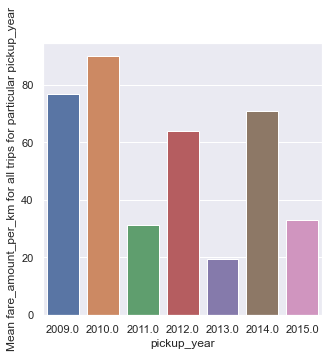

In [60]:
#display graph for Mean fare amount per km for different years

plot_mean_fareamt("pickup_year")


# **Plot for Mean fare amount per km calculated for all trips for specific years shows that for year 2010 and 2009 it's maximum. it decreased a lot in between specifically for 2011 year and 2013 year. then it showed sudden rise in year 2014.**

# ## **Mean Fare Amount per Km Vs Month**

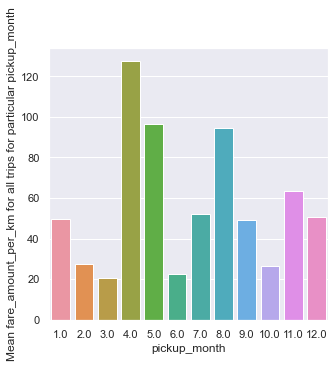

In [61]:
#display graph for Mean fare amount per km for different months

plot_mean_fareamt("pickup_month")


# **Plot for Mean fare amount per km calculated for all trips for specific months shows that for month of April,May and August, it's maximum**

# ## **Mean Fare Amount per Km Vs Weekday**

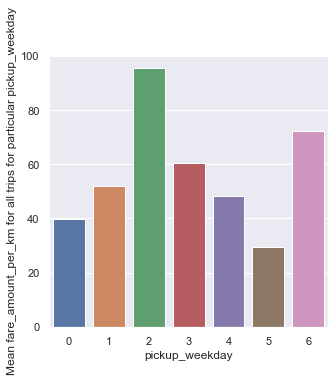

In [62]:
#display graph for Mean fare amount per km for different weekdays

plot_mean_fareamt("pickup_weekday")


# **Plot for Mean fare amount per km calculated for all trips for specific weekday shows that for wednesday and Sunday it's maximum**

# ## **Mean Fare Amount per Km Vs Hours**

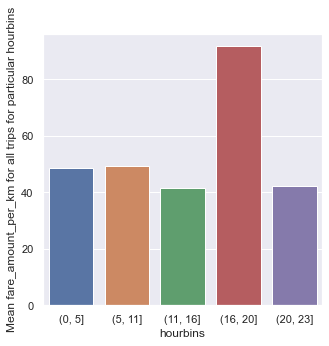

In [63]:
#display graph for Mean fare amount per km for different hours
bins = [0,5,11,16,20,23]
train['hourbins'] = pd.cut(train['pickup_hour'], bins)
plot_mean_fareamt("hourbins")
# **Plot for Mean fare amount per km calculated for all trips for specific hours shows that between 1 am to 5 am the mean fare amount is maximum even more than the peak hours, it can be due to unusual hours that taxis are charging high fare amount.**

In [64]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure, ColumnDataSource
from bokeh.tile_providers import get_provider, Vendors
from bokeh.palettes import PRGn, RdYlGn
from bokeh.transform import linear_cmap,factor_cmap
from bokeh.layouts import row, column
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter
import numpy as np
import pandas as pd

In [65]:
train.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'pickup_date', 'pickup_weekday',
       'pickup_month', 'pickup_year', 'pickup_hour', 'fare_amount', 'farebins',
       'distance', 'fare_amount_per_km', 'hourbins'],
      dtype='object')

In [66]:
def x_coord(x, y):
    
    lat = x
    lon = y
    
    r_major = 6378137.000
    x = r_major * np.radians(lon)
    scale = x/lon
    y = 180.0/np.pi * np.log(np.tan(np.pi/4.0 + 
        lat * (np.pi/180.0)/2.0)) * scale
    return (x, y)
# Define coord as tuple (lat,long)
train['coordinates'] = list(zip(train['pickup_latitude'], train['pickup_longitude']))
# Obtain list of mercator coordinates
mercators = [x_coord(x, y) for x, y in train['coordinates'] ]

In [67]:
# Create mercator column in our df
train['mercator'] = mercators
# Split that column out into two separate columns - mercator_x and mercator_y
train[['mercator_x', 'mercator_y']] = train['mercator'].apply(pd.Series)

In [68]:
train = train.drop(['farebins'],axis=1)

In [69]:
get_ipython().system(' pip install bokeh')

In [70]:
import bokeh
def bokeh_plot_hour(train,from_hour,to_hour,year):
    train =  train[train['pickup_year'] == year]
    train = train[train['pickup_hour'] >= from_hour ]
    train = train[train['pickup_hour'] <= to_hour ]

    # Select tile set to use
    chosentile = get_provider(Vendors.STAMEN_TONER)
    # Choose palette
    palette = PRGn[11]
    # Tell Bokeh to use train as the source of the data
    source = ColumnDataSource(data=train)
    # Define color mapper - which column will define the colour of the data points
    color_mapper = linear_cmap(field_name = 'fare_amount_per_km', palette = palette, low = train['fare_amount_per_km'].min(), high = train['fare_amount_per_km'].max())
    # Set tooltips - these appear when we hover over a data point in our map, very nifty and very useful
    tooltips = [("Fare Amount per km","@fare_amount_per_km"),("Pickup Month","@pickup_month"),("Pickup weekday","@pickup_weekday"),("Pickup Hour","@pickup_hour")]
    # Create figure
    p = figure(title = 'Fare Amount per km by region for hours '+str(from_hour)+"-"+ str(to_hour)+"-year-"+str(year), x_axis_type="mercator", y_axis_type="mercator", x_axis_label = 'pickup_longitude', y_axis_label = 'pickup_latitude', tooltips = tooltips)
    # Add map tile
    p.add_tile(chosentile)
    # Add points using mercator coordinates
    p.circle(x = 'mercator_x', y = 'mercator_y', color = color_mapper, source=source, size=10, fill_alpha = 0.7)
    #Defines color bar
    color_bar = ColorBar(color_mapper=color_mapper['transform'], 
                        formatter = NumeralTickFormatter(format='0.0[0000]'), 
                        label_standoff = 14, width=2, location=(0,0))
    # Set color_bar location
    p.add_layout(color_bar, 'right')
    # Display in notebook
    output_notebook()
    # Save as HTML
    name = 'fareamountperkm_'+str(from_hour)
    output_file(name, title='Fare Amount per km by region for hour range'+str(from_hour)+"-"+str(to_hour))
    # Show map
    show(p)

In [71]:
bokeh_plot_hour(train,17,22,2015)

Loading BokehJS ...

In [72]:
bokeh_plot_hour(train,0,6,2015)


# **To visualize in map, we can use Bokeh to visualize  the trips for different hours based on pickup location. For first plot, we were able to see the pickup locations for evening hours (5 pm to 10 pm ). For second plot,we were able to see the pickup locations for unsual hours(12 am to 6 am). By hovering cursor on the locations, we can compare the fare amount for different hours and other details availble in tooltip.**

Loading BokehJS ...

In [73]:

# direction of a trip, from 180 to -180 degrees. Horizontal axes = 0 degrees.
def calculate_direction(lat1, lon1, lat2, lon2):
    lon1=lon1.to_numpy()
    lat1=lat1.to_numpy()
    lon2=lon2.to_numpy()
    lat2=lat2.to_numpy()
    diff_lon = np.deg2rad(lon2-lon1)
    x = np.sin(diff_lon) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - (np.sin(lat1) * np.cos(lat2) * np.cos(diff_lon))
    initial_bearing = np.arctan2(x, y)

    # Now we have the initial bearing but math.atan2 return values
    # from -180° to + 180°.
    direction = np.degrees (initial_bearing)
    # Now we have the initial bearing but math.atan2 return values
    # from -180° to + 180° which is not what we want for a compass bearing
    # The solution is to normalize the initial bearing as shown below
    initial_bearing = np.degrees (initial_bearing)
    direction = (initial_bearing + 360) % 360
    return direction
    

train['direction'] = calculate_direction(train['pickup_latitude'], train['pickup_longitude'],train['dropoff_latitude'], train['dropoff_longitude'])

In [74]:
train["hourbins"] = train["hourbins"].astype('category')
train['encoded_hours'] = train["hourbins"].cat.codes
train.head()

KeyError: 'hourbins'

In [ ]:
train['fare_amount_per_km'].describe()

count    133506.000000
mean         56.770763
std        3637.086669
min         -15.370121
25%           2.993917
50%           3.848976
75%           5.087991
max      616348.928571
Name: fare_amount_per_km, dtype: float64

In [ ]:
train.shape

(133506, 21)

In [ ]:
train = train[(train['fare_amount_per_km']>0) & (train['fare_amount_per_km']<=80) ]
train.shape

(132791, 21)

In [ ]:
min(train['fare_amount_per_km'])

0.0378056547929404

<AxesSubplot:xlabel='direction', ylabel='fare_amount_per_km'>

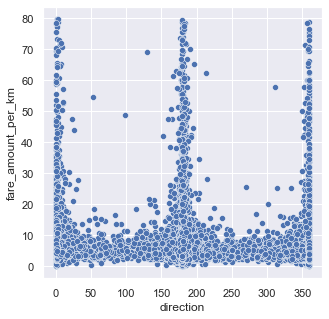

In [ ]:
sns.scatterplot(data=train, x="direction", y="fare_amount_per_km")

<AxesSubplot:xlabel='direction', ylabel='fare_amount'>

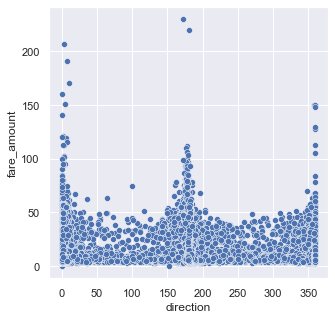

In [ ]:
sns.scatterplot(data=train, x="direction", y="fare_amount")


# **There seems to be some impact of direction on target variable fare amount**

In [ ]:
train.head()

pickup_longitude  pickup_latitude  dropoff_longitude  \
104406        -73.954347        40.763839         -73.950884   
155552        -73.977028        40.743278         -73.986602   
75475         -73.983017        40.781655         -73.976823   
142151        -73.982161        40.757050         -73.959005   
109426        -73.958803        40.815331         -73.961285   

        dropoff_latitude  passenger_count pickup_date  pickup_weekday  \
104406         40.771308              1.0  2013-09-22               6   
155552         40.728143              1.0  2011-03-25               4   
75475          40.788423              3.0  2009-01-07               2   
142151         40.783415              1.0  2009-06-12               4   
109426         40.811988              1.0  2011-03-22               1   

        pickup_month  pickup_year  pickup_hour  ...     farebins  distance  \
104406           9.0       2013.0         19.0  ...   (0.0, 5.0]  0.880232   
155552           3.0       2011.0         17.0  ...  (5.0, 10.0]  1.866275   
75475            1.0       2009.0         17.0  ...   (0.0, 5.0]  0.915594   
142151           6.0       2009.0         15.0  ...  (5.0, 10.0]  3.520959   
109426           3.0       2011.0          8.0  ...   (0.0, 5.0]  0.426391   

        fare_amount_per_km  hourbins              coordinates  \
104406            5.680319  (16, 20]  (40.763839, -73.954347)   
155552            2.839882  (16, 20]  (40.743278, -73.977028)   
75475             4.477967  (16, 20]  (40.781655, -73.983017)   
142151            2.527720  (11, 16]   (40.75705, -73.982161)   
109426            7.739378   (5, 11]  (40.815331, -73.958803)   

                                       mercator    mercator_x    mercator_y  \
104406   (-8232560.24998906, 4977570.128221102) -8.232560e+06  4.977570e+06   
155552  (-8235085.087359742, 4974548.654648803) -8.235085e+06  4.974549e+06   
75475   (-8235751.779790102, 4980188.975376161) -8.235752e+06  4.980189e+06   
142151  (-8235656.490305984, 4976572.369906419) -8.235656e+06  4.976572e+06   
109426  (-8233056.289640035, 4985141.068750157) -8.233056e+06  4.985141e+06   

         direction  encoded_hours  
104406  359.537472              3  
155552  179.371431              3  
75475   359.086132              3  
142151  359.123122              2  
109426  179.257899              1  

[5 rows x 21 columns]

In [ ]:
train.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'pickup_date', 'pickup_weekday',
       'pickup_month', 'pickup_year', 'pickup_hour', 'fare_amount', 'farebins',
       'distance', 'fare_amount_per_km', 'hourbins', 'coordinates', 'mercator',
       'mercator_x', 'mercator_y', 'direction', 'encoded_hours'],
      dtype='object')

Text(0, 0.5, 'average fare amount $USD')

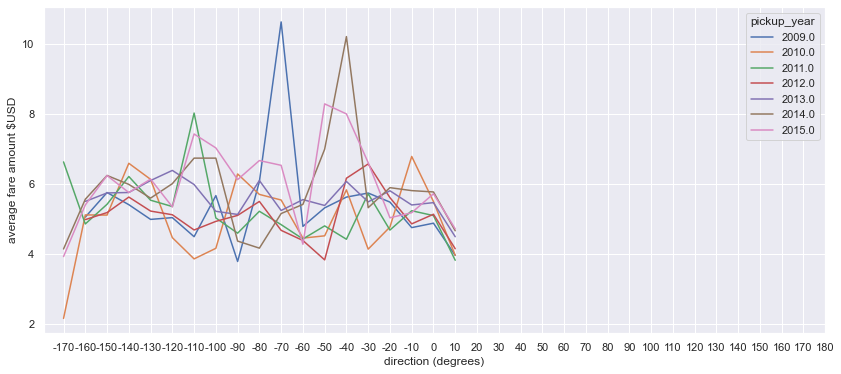

In [ ]:
# Impact of direction on the target variable

fig, ax = plt.subplots(1, 1, figsize=(14,6))
direc = pd.cut(train['direction'], np.linspace(-180, 180, 37))
train.pivot_table('fare_amount_per_km', index=[direc], columns='pickup_year', aggfunc='mean').plot(ax=ax)
plt.xlabel('direction (degrees)')
plt.xticks(range(36), np.arange(-170, 190, 10))
plt.ylabel('average fare amount $USD')

In [ ]:
test.head()

pickup_longitude  pickup_latitude  dropoff_longitude  \
54458         -73.961287        40.771617         -73.974797   
193387        -73.937060        40.854562         -73.984868   
57401         -73.978800        40.762280         -73.973973   
115324        -73.958191        40.760422         -73.861557   
71684         -73.951845        40.778344         -73.958517   

        dropoff_latitude  passenger_count pickup_date pickup_weekday  \
54458          40.761457                1  2009-11-12       Thursday   
193387         40.773842                2  2013-02-17         Sunday   
57401          40.762740                1  2011-12-24       Saturday   
115324         40.865349                1  2015-02-09         Monday   
71684          40.783291                1  2009-11-03        Tuesday   

        pickup_month  pickup_year  pickup_hour  fare_amount  
54458             11         2009           19          7.7  
193387             2         2013           13         24.0  
57401             12         2011           14          4.1  
115324             2         2015           12         34.0  
71684             11         2009           15          4.5

In [ ]:
test['distance'] =  test.apply(lambda row:calculate_distance(row['pickup_longitude'],row['pickup_latitude'],row['dropoff_longitude'],row['dropoff_latitude']),axis=1)
test['direction'] = calculate_direction(test['pickup_latitude'], test['pickup_longitude'],test['dropoff_latitude'], test['dropoff_longitude'])
test['pickup_weekday'] = pd.to_datetime(test['pickup_date']).apply(lambda x: x.weekday())
test["hourbins"] = test["hourbins"].astype('category')
test['encoded_hours'] = test["hourbins"].cat.codes


In [ ]:
train.head()

In [ ]:
test.head()

pickup_longitude  pickup_latitude  dropoff_longitude  \
54458         -73.961287        40.771617         -73.974797   
193387        -73.937060        40.854562         -73.984868   
57401         -73.978800        40.762280         -73.973973   
115324        -73.958191        40.760422         -73.861557   
71684         -73.951845        40.778344         -73.958517   

        dropoff_latitude  passenger_count pickup_date  pickup_weekday  \
54458          40.761457                1  2009-11-12               3   
193387         40.773842                2  2013-02-17               6   
57401          40.762740                1  2011-12-24               5   
115324         40.865349                1  2015-02-09               0   
71684          40.783291                1  2009-11-03               1   

        pickup_month  pickup_year  pickup_hour  fare_amount   distance  \
54458             11         2009           19          7.7   1.603380   
193387             2         2013           13         24.0   9.836146   
57401             12         2011           14          4.1   0.409743   
115324             2         2015           12         34.0  14.221987   
71684             11         2009           15          4.5   0.786243   

         direction  delta_longitude  delta_latitude  
54458   178.674663         0.013510        0.010160  
193387  179.408433         0.047808        0.080720  
57401   349.652379         0.004827        0.000460  
115324  359.077704         0.096634        0.104927  
71684     1.346232         0.006672        0.004947

In [ ]:
test.to_csv('test_data.csv')
train.to_csv('processed_data.csv')